<a href="https://colab.research.google.com/github/tushariccs/GSOC-Preperation/blob/sanat/AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: xlabel='price'>

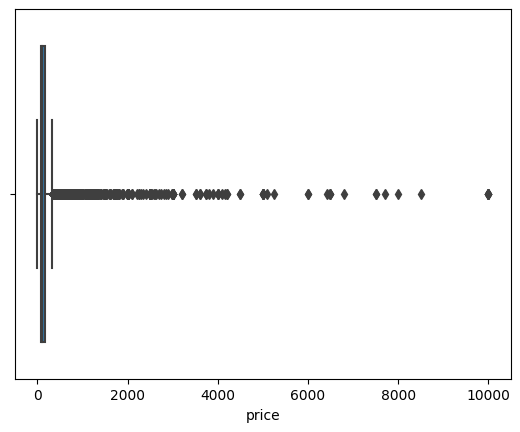

In [ ]:
sns.boxplot(x= df['price'])


<Axes: xlabel='neighbourhood_group', ylabel='price'>

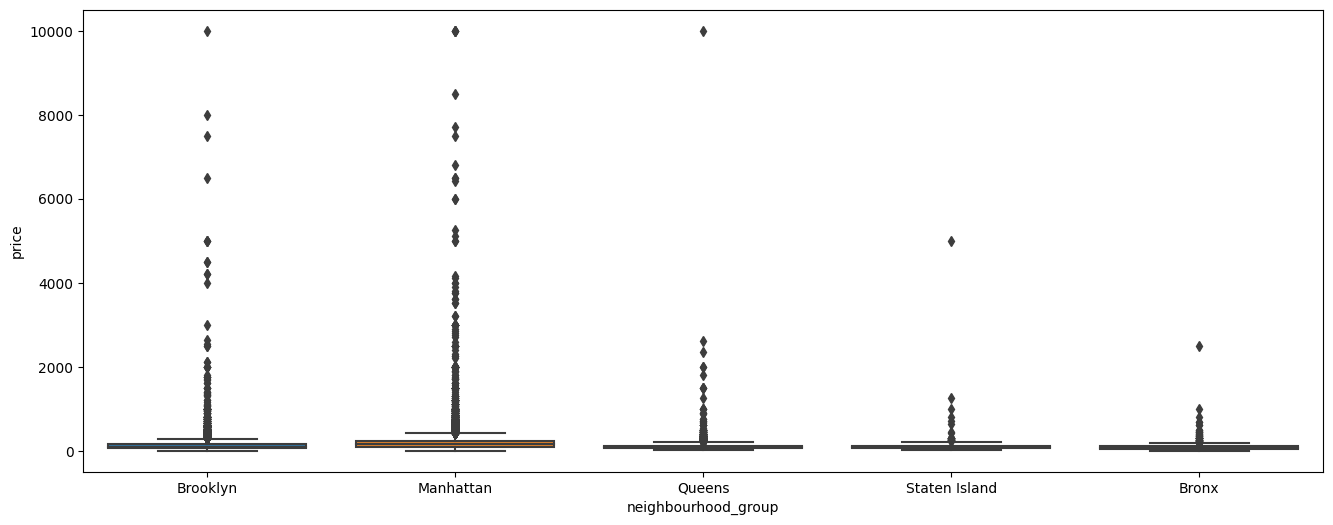

In [ ]:
plt.figure(figsize=(16, 6)) #this line defines the size of the output not compulsory
sns.boxplot(x="neighbourhood_group", y="price", data=df)

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="minimum_nights", y="price", data=df)

<Axes: xlabel='neighbourhood', ylabel='price'>

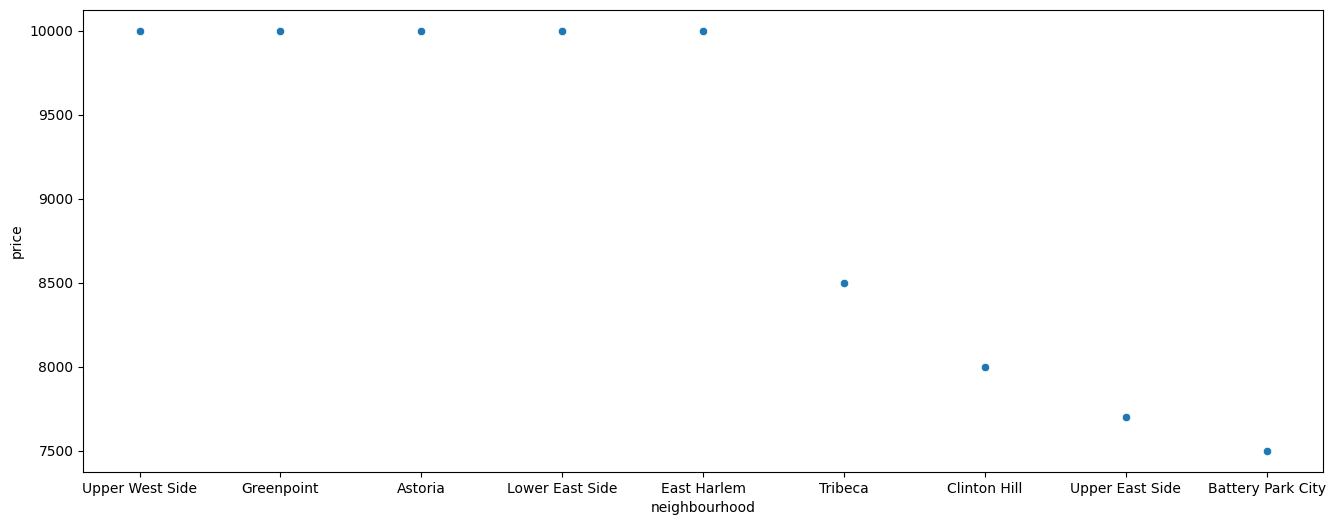

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="neighbourhood", y="price", data=df.sort_values('price', ascending=False).head(10))

<Axes: xlabel='neighbourhood', ylabel='price'>

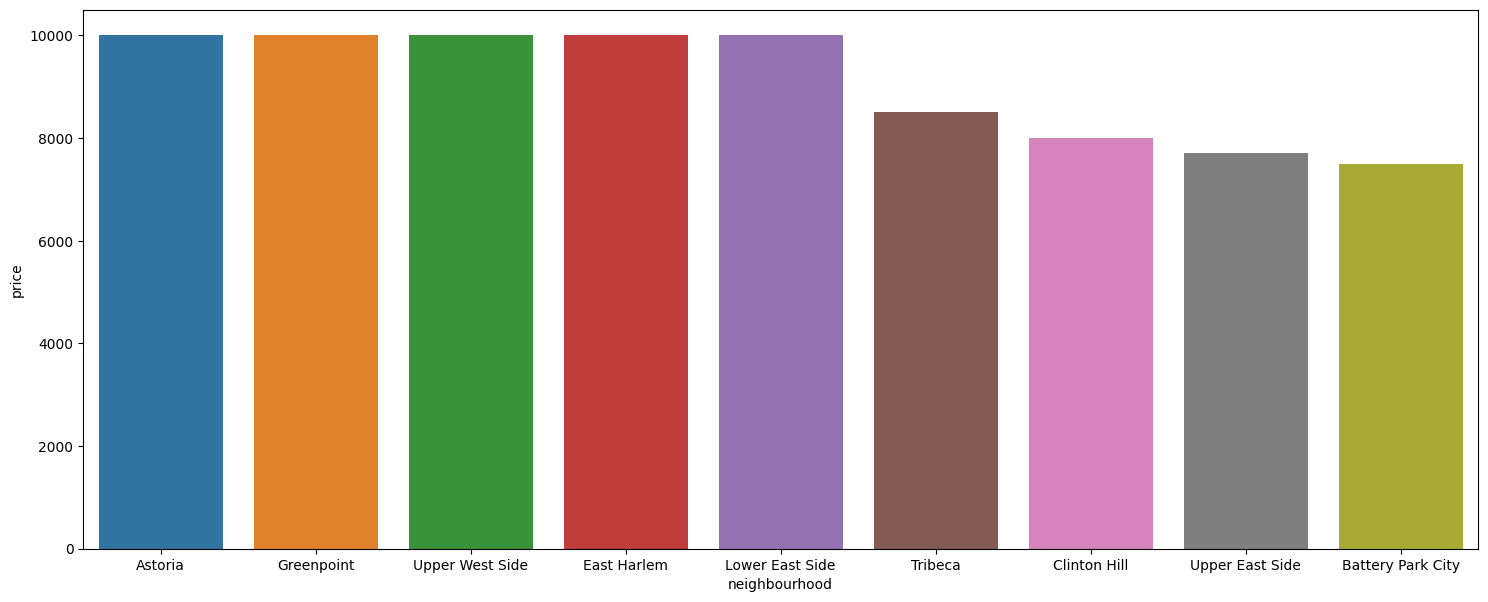

In [ ]:
plt.figure(figsize =(18,7))
sns.barplot(x="neighbourhood", y="price", data=df.nlargest(10,['price']))

In [ ]:
print ("Total Neighbourhoods: ", len(np.unique(df.neighbourhood)))

Total Neighbourhoods:  221


In [ ]:
df_top_prices_by_neighbourhood = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price')

In [ ]:
print(df_top_prices_by_neighbourhood)

                     price
neighbourhood             
Bull's Head      47.333333
Hunts Point      50.500000
Tremont          51.545455
Soundview        53.466667
New Dorp         57.000000
...                    ...
Riverdale       442.090909
Sea Gate        487.857143
Tribeca         490.638418
Woodrow         700.000000
Fort Wadsworth  800.000000

[221 rows x 1 columns]


In [ ]:
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

<Axes: xlabel='neighbourhood', ylabel='price'>

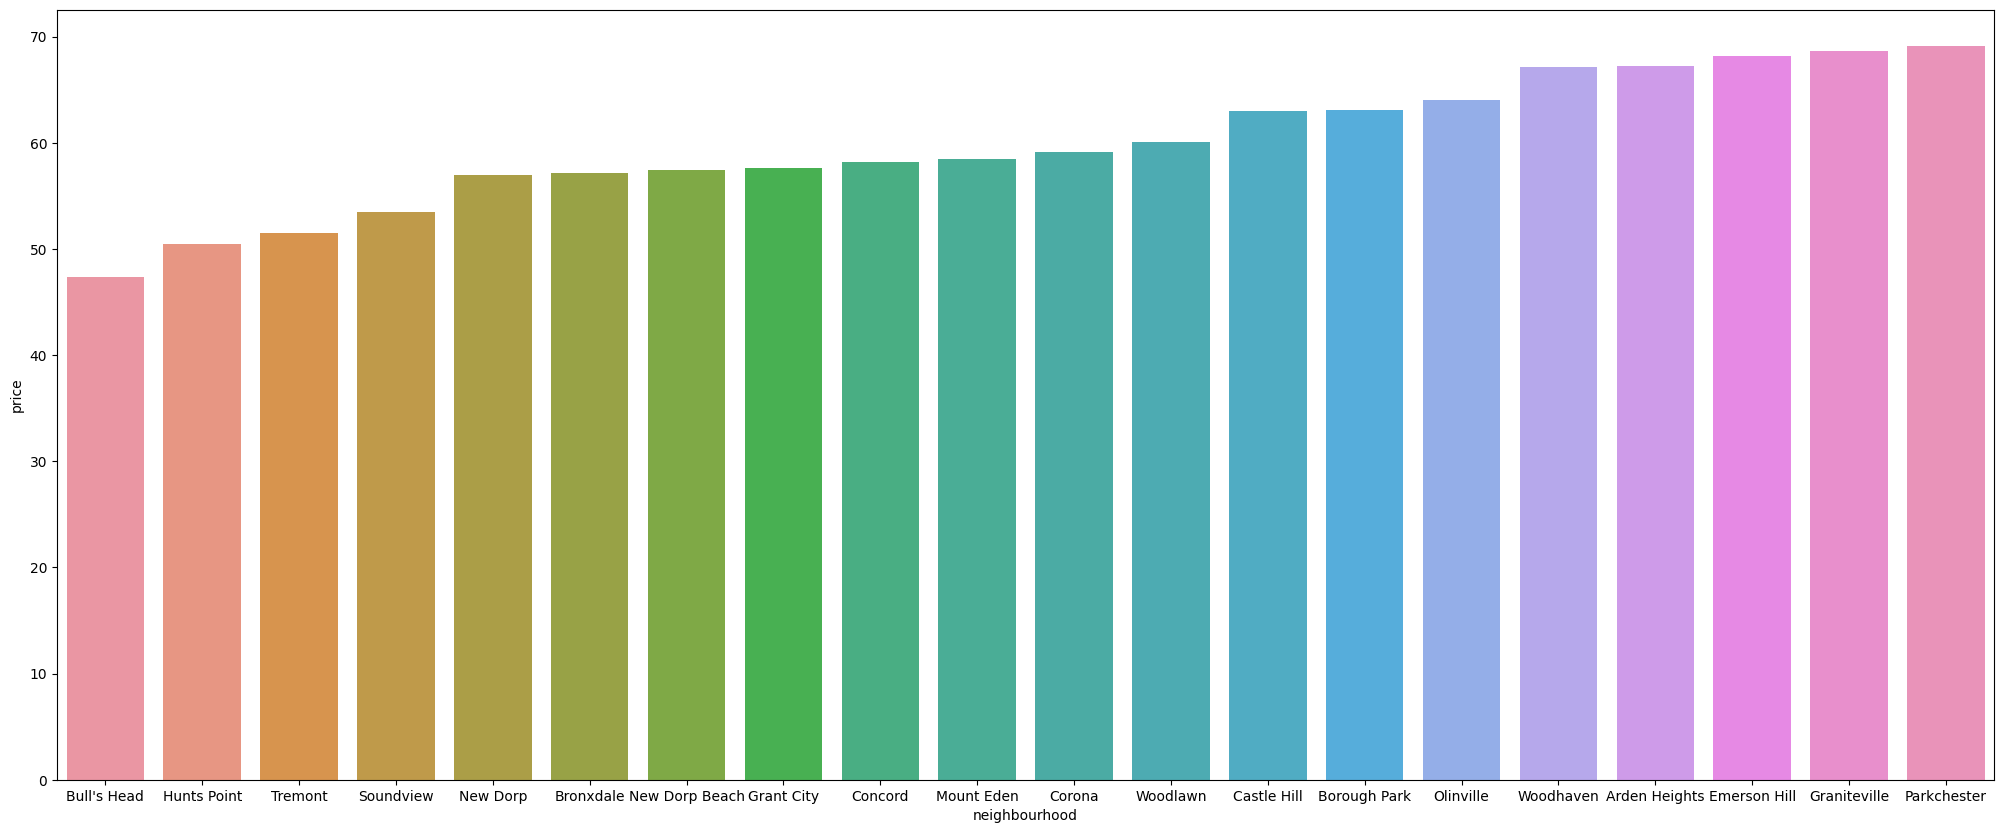

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(x="neighbourhood", y="price", data=df_top_prices_by_neighbourhood.head(20))

In [ ]:
df_host_popularity = df.groupby('host_id').agg({'number_of_reviews': 'sum'})

In [ ]:
print(df_host_popularity)

         host_id  popularity_index
0           2438          0.000088
1           2571          0.002373
2           2787          0.009227
3           2845          0.004042
4           2868          0.000176
...          ...               ...
37452  274273284          0.000000
37453  274298453          0.000000
37454  274307600          0.000000
37455  274311461          0.000000
37456  274321313          0.000000

[37457 rows x 2 columns]


In [ ]:
total_reviews = df.number_of_reviews.sum()
total_reviews

1138005

In [ ]:
df_host_popularity['popularity_index'] = df_host_popularity['number_of_reviews']. \
                                                apply(lambda x: x/float(total_reviews)*100) #lambda is used to calculate percentage

In [ ]:
df_host_popularity.sort_values('popularity_index', ascending=False).head(10)

,number_of_reviews,popularity_index
host_id,,
37312959,2273,0.199736
344035,2205,0.193760
26432133,2017,0.177240
35524316,1971,0.173198
40176101,1818,0.159753
4734398,1798,0.157996
16677326,1355,0.119068
6885157,1346,0.118277
219517861,1281,0.112565


In [ ]:
df_host_popularity = df_host_popularity.reset_index()
del df_host_popularity['number_of_reviews']

In [ ]:
df_host_popularity.head(10)

,host_id,popularity_index
0,2438,0.000088
1,2571,0.002373
2,2787,0.009227
3,2845,0.004042
4,2868,0.000176
5,2881,0.034270
6,3151,0.000088
7,3211,0.001845
8,3415,0.000351
9,3563,0.000088


In [ ]:
df = pd.merge(df, df_host_popularity)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,popularity_index
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0.009227
1,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153,0.009227
2,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174,0.009227
3,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180,0.009227
4,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180,0.009227


In [ ]:
p_inde_filtered = df.filter(["neighbourhood","minimum_nights",'popularity_index'])
new = p_inde_filtered.query('minimum_nights>7')
new1 = new.sort_values('popularity_index', ascending=False).head(20)
new1['neighbourhood']

40292    Financial District
40268    Financial District
40266      Theater District
40265    Financial District
40264        Hell's Kitchen
40263    Financial District
40262       Upper East Side
40261    Financial District
40260    Financial District
40259    Financial District
40258           Murray Hill
40257           Murray Hill
40256      Theater District
40255        Hell's Kitchen
40254        Hell's Kitchen
40157           Murray Hill
40253           Murray Hill
40252           Murray Hill
40251           Murray Hill
40250        Hell's Kitchen
Name: neighbourhood, dtype: object

In [ ]:
df_popular_regions = df.groupby('neighbourhood').agg({'popularity_index': 'sum'}).reset_index()


<Axes: xlabel='neighbourhood', ylabel='popularity_index'>

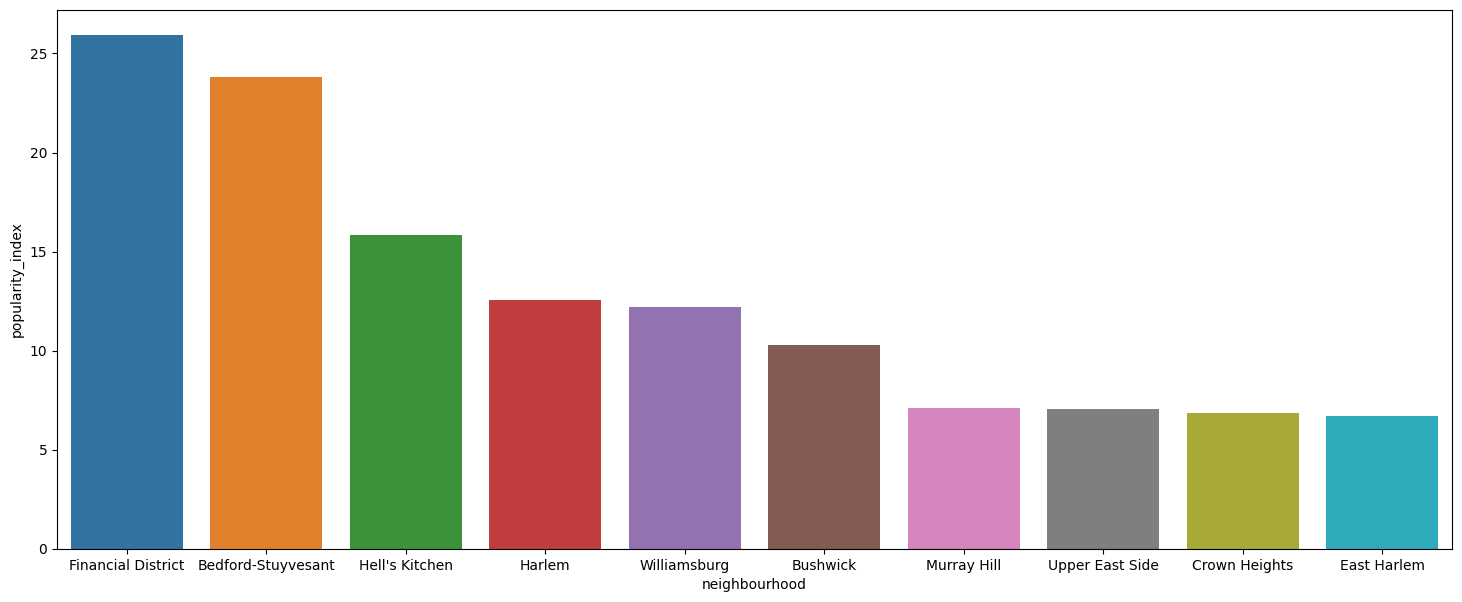

In [ ]:
plt.figure(figsize=(18, 7))
sns.barplot(x='neighbourhood', y='popularity_index', data=df_popular_regions.sort_values('popularity_index',
                                                                                        ascending=False).head(10))

In [ ]:
df_n_roomtype = df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df_n_roomtype

price
neighbourhood room_type             
Allerton      Entire home/apt   1969
              Private room      1710
Arden Heights Entire home/apt    228
              Private room        41
Arrochar      Entire home/apt   1897
...                              ...
Woodlawn      Shared room         70
Woodrow       Entire home/apt    700
Woodside      Entire home/apt   9369
              Private room     10564
              Shared room         65

[540 rows x 1 columns]

In [ ]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood'], columns=['room_type'])


KeyError: ignored

In [ ]:
df_n_roomtype.sort_values('Private room', ascending = False).head(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Williamsburg,389724.0,171265.0,2718.0


In [ ]:
df_n_roomtype.sort_values('Private room', ascending = True).head(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Graniteville,186.0,20.0,NaN


In [ ]:
df_n_roomtype.sort_values('Entire home/apt', ascending = False).head(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Williamsburg,389724.0,171265.0,2718.0


In [ ]:
df_n_roomtype.sort_values('Entire home/apt', ascending = True).head(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
New Dorp,57.0,NaN,NaN


In [ ]:
df_n_roomtype.sort_values('Shared room', ascending = False).head(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Hell's Kitchen,301786.0,89713.0,9488.0


In [ ]:
df_n_roomtype.sort_values('Shared room', ascending = True).head(1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Randall Manor,5859.0,512.0,13.0


In [ ]:
df_neighbourhood_room_type_mean = df.groupby(['neighbourhood', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()

In [ ]:
#renaming a column
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.rename(columns = {'price': 'average_region_price'})
#creating a pivot table
df_neighbourhood_room_type_mean_pivot = pd.pivot_table(df_neighbourhood_room_type_mean, values='average_region_price',
                           index=['neighbourhood'], columns=['room_type'])

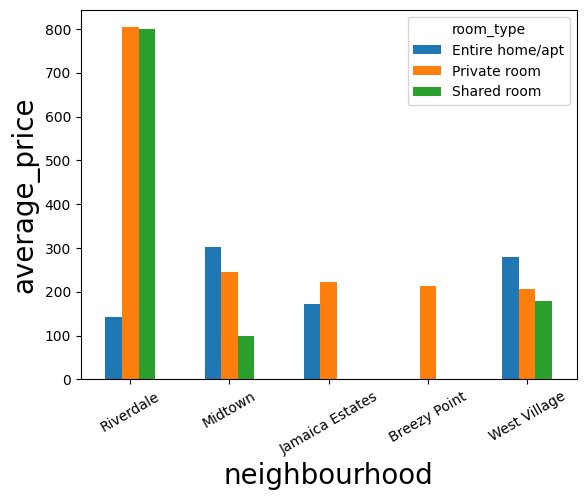

In [ ]:
import matplotlib.pyplot as plt
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
labels=list(df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:5])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()